<a href="https://colab.research.google.com/github/hksantosh/sscm/blob/main/capstone/Supplier_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ortools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# read file
DF = pd.read_csv('capstone_supplier_data.csv')
DF.head()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,Bad,0.478,...,0.130,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,1
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,Good,0.713,...,0.033,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,2
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,Excellent,0.805,...,0.060,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,2
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,Average,0.847,...,0.209,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,1
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,Bad,0.578,...,0.351,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,1


In [ ]:
DF.shape

(1000, 22)

In [ ]:
# In the target column, replace 1 with 0 and 2 with 1. So that the defaulters will become positive class.
DF['Supplier’s default'] = DF['Supplier’s default'].replace([1], 0)
DF.head()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,Bad,0.478,...,0.130,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,0
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,Good,0.713,...,0.033,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,2
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,Excellent,0.805,...,0.060,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,2
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,Average,0.847,...,0.209,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,0
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,Bad,0.578,...,0.351,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,0


In [ ]:
DF['Supplier’s default'] = DF['Supplier’s default'].replace([2], 1)
DF.head()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,Bad,0.478,...,0.130,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,0
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,Good,0.713,...,0.033,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,1
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,Excellent,0.805,...,0.060,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,1
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,Average,0.847,...,0.209,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,0
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,Bad,0.578,...,0.351,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,0


In [ ]:
DF['Reputation'] = DF['Reputation'].replace(['Excellent','Good','Average','Bad'], [1,.75,.5,.25])
DF.head()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,0.25,0.478,...,0.130,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,0
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,0.75,0.713,...,0.033,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,1
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,1.00,0.805,...,0.060,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,1
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,0.50,0.847,...,0.209,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,0
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,0.25,0.578,...,0.351,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,0


In [ ]:
#Check Null values
DF.isnull().sum()
# imputation for the missing values ?

Supplier ID              0
Cost                     0
Quality                  1
Delivery time            0
Reliability              2
Flexibility              2
Capacity                 1
Innovation               2
Reputation               2
Financial stability      0
Environmental impact     0
Social responsibility    0
Safety record            0
Technical expertise      0
Customer service         0
Lead time                0
Responsiveness           1
Contract terms           1
Diversity                0
Sustainability           1
Scalability              1
Supplier’s default       0
dtype: int64

In [ ]:
# staistical measures
DF.describe()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
count,1000.000000,1000.000000,999.000000,1000.000000,998.000000,998.000000,999.000000,998.000000,998.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,999.000000,999.000000,1000.000000,999.000000,999.000000,1000.000000
mean,1500.500000,0.487184,0.510847,0.500643,0.513186,0.503326,0.505993,0.518637,0.623497,0.491741,...,0.500012,0.504658,0.497444,0.494643,0.489079,0.500069,0.501644,0.500696,0.497949,0.272000
std,288.819436,0.289946,0.283552,0.294141,0.285107,0.294474,0.286334,0.286429,0.284093,0.290615,...,0.291850,0.294110,0.284664,0.283233,0.290497,0.293173,0.285467,0.294314,0.292739,0.445213
min,1001.000000,0.001000,0.001000,0.000000,0.003000,0.003000,0.001000,0.001000,0.250000,0.000000,...,0.000000,0.001000,0.001000,0.000000,0.001000,0.002000,0.000000,0.001000,0.002000,0.000000
25%,1250.750000,0.236500,0.276000,0.233000,0.271000,0.244000,0.262000,0.272500,0.250000,0.230000,...,0.240000,0.247750,0.253750,0.250750,0.229500,0.240500,0.263750,0.239500,0.249000,0.000000
50%,1500.500000,0.481500,0.506000,0.503000,0.511500,0.511000,0.508000,0.529500,0.500000,0.487000,...,0.515000,0.495500,0.487500,0.494000,0.486000,0.508000,0.507500,0.496000,0.487000,0.000000
75%,1750.250000,0.735250,0.753000,0.761750,0.760750,0.762000,0.746000,0.767750,1.000000,0.742250,...,0.750000,0.768250,0.750000,0.734250,0.749500,0.764500,0.744250,0.746000,0.767000,1.000000
max,2000.000000,0.999000,0.994000,0.999000,0.998000,0.997000,1.000000,0.998000,1.000000,0.998000,...,1.000000,0.998000,1.000000,1.000000,0.998000,1.000000,0.999000,0.999000,1.000000,1.000000


In [ ]:
#Preprocessing with scaled version
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = DF.columns
d = scaler.fit_transform(DF)
scaled_df = pd.DataFrame(d, columns=names)

scaled_df.head()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
0,0.000000,0.874749,0.762336,0.082082,0.111558,0.079477,0.870871,0.239719,0.000000,0.478958,...,0.130,0.948847,0.462462,0.969,0.043129,0.811623,0.044044,0.853707,0.662325,0.0
1,0.001001,0.972946,0.697885,0.955956,0.964824,0.242455,0.848849,0.000000,0.666667,0.714429,...,0.033,0.241725,0.866867,0.523,0.583751,0.967936,0.490490,0.515030,0.026052,1.0
2,0.002002,0.827655,0.414904,0.199199,0.576884,0.124748,0.231231,0.476429,1.000000,0.806613,...,0.060,0.191575,0.445445,0.145,0.568706,0.079158,0.822823,0.826653,0.156313,1.0
3,0.003003,0.421844,0.557905,0.969970,0.760804,0.774648,0.010010,0.358074,0.333333,0.848697,...,0.209,0.279840,0.698699,0.863,0.423270,0.269539,0.960961,0.468938,0.913828,0.0
4,0.004004,0.767535,0.963746,0.915916,0.719598,0.716298,0.552553,0.651956,0.000000,0.579158,...,0.351,0.130391,0.405405,0.963,0.940822,0.980962,0.004004,0.012024,0.574148,0.0


In [ ]:
# staistical measures
scaled_df.describe()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
count,1000.000000,1000.000000,999.000000,1000.000000,998.000000,998.000000,999.000000,998.000000,998.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,999.000000,999.000000,1000.000000,999.000000,999.000000,1000.000000
mean,0.500000,0.487158,0.513441,0.501144,0.512750,0.503346,0.505498,0.519195,0.497996,0.492726,...,0.500012,0.505174,0.496941,0.494643,0.489548,0.499067,0.502146,0.500697,0.496943,0.272000
std,0.289109,0.290527,0.285551,0.294436,0.286540,0.296252,0.286621,0.287291,0.378790,0.291198,...,0.291850,0.294995,0.284949,0.283233,0.291371,0.293760,0.285753,0.294904,0.293325,0.445213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.235972,0.276939,0.233233,0.269347,0.242455,0.261261,0.272317,0.000000,0.230461,...,0.240000,0.247492,0.253003,0.250750,0.229188,0.238978,0.264014,0.238978,0.247495,0.000000
50%,0.500000,0.481463,0.508560,0.503504,0.511055,0.511066,0.507508,0.530090,0.333333,0.487976,...,0.515000,0.495988,0.486987,0.494000,0.486459,0.507014,0.508008,0.495992,0.485972,0.000000
75%,0.750000,0.735721,0.757301,0.762513,0.761558,0.763581,0.745746,0.769057,1.000000,0.743737,...,0.750000,0.769559,0.749750,0.734250,0.750752,0.764028,0.744995,0.746493,0.766533,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# understand correlation
correlation = scaled_df.corr()

<Axes: >

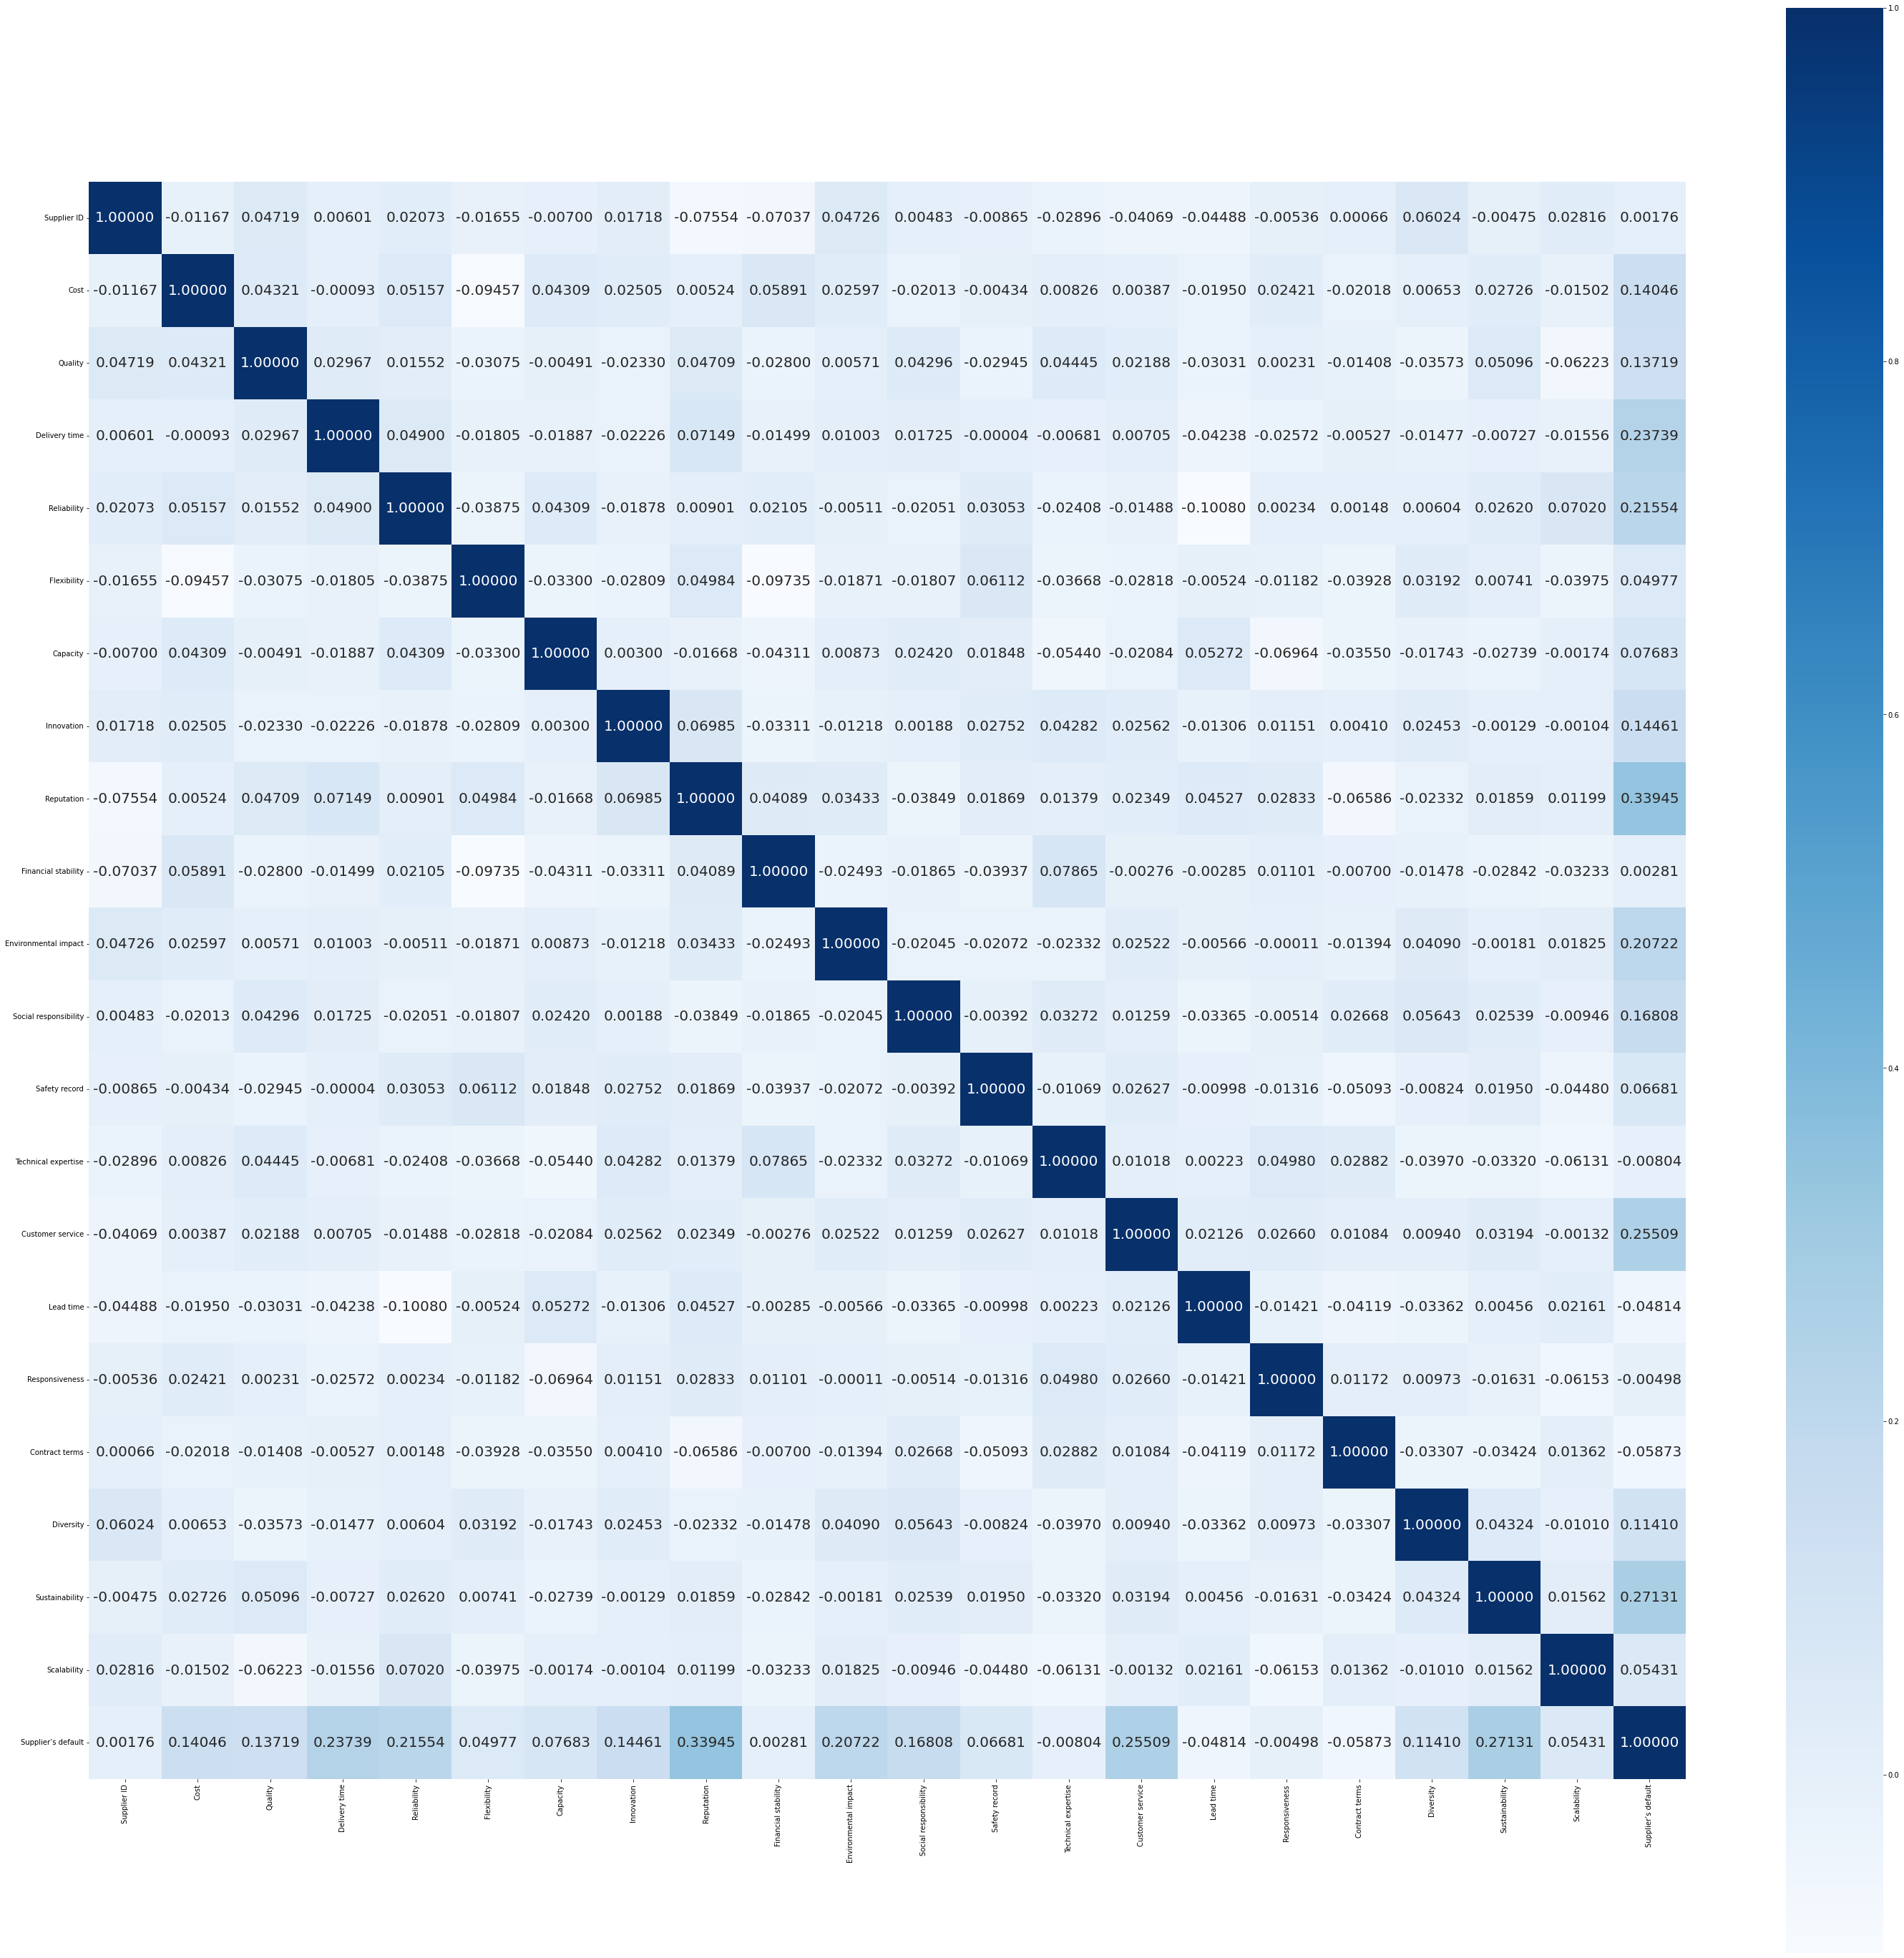

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(correlation, cbar=True, square=True, fmt='.5f', annot=True, annot_kws={'size':20}, cmap='Blues')

In [ ]:
# splitting the data into features and target
X = scaled_df.drop(['Supplier’s default'], axis=1)
Y = scaled_df['Supplier’s default']
Y1 = pd.DataFrame(Y)

print(X)
print(Y)

     Supplier ID      Cost   Quality  Delivery time  Reliability  Flexibility  \
0       0.000000  0.874749  0.762336       0.082082     0.111558     0.079477   
1       0.001001  0.972946  0.697885       0.955956     0.964824     0.242455   
2       0.002002  0.827655  0.414904       0.199199     0.576884     0.124748   
3       0.003003  0.421844  0.557905       0.969970     0.760804     0.774648   
4       0.004004  0.767535  0.963746       0.915916     0.719598     0.716298   
..           ...       ...       ...            ...          ...          ...   
995     0.995996  0.200401  0.260826       0.060060     0.824121     0.218310   
996     0.996997  0.127255  0.409869       0.611612     0.774874     0.350101   
997     0.997998  0.910822  0.309164       0.381381     0.819095     0.672032   
998     0.998999  0.407816  0.271903       0.921922     0.648241     0.950704   
999     1.000000  0.518036  0.320242       0.344344     0.596985     0.705231   

     Capacity  Innovation  

In [ ]:
# Exploratory data analysis: Perform exploratory data analysis to identify which factors differentiate/influences customers who are defaulting with others.
# Data Imbalance: Identify whether the target column is balanced or imbalanced. Plot the same using
# a simple pie chart.
# Convert all categorical columns to numerical columns using one hot encoding.


In [ ]:
# split into train and test data
print(type(Y))
print(type(Y1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 99999999)
print(X.shape, X_train.shape, X_test.shape, Y.shape, Y_train.shape, Y_test.shape, Y1.shape)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
(1000, 21) (800, 21) (200, 21) (1000,) (800,) (200,) (1000, 1)


In [ ]:
#model training

#XGBRegressor

model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Evaluation

# Prediction on training data

# accuracy for prediction
training_data_prediction = model.predict(X_train)
np.set_printoptions(precision=3,suppress=True)
training_data_prediction1 = training_data_prediction.round()
print(training_data_prediction1.sum())
print(training_data_prediction1)

220.0
[ 0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  1.  1. -0.  0.  0. -0. -0.  1.
  0. -0.  0. -0.  0.  0. -0.  1. -0.  1.  0. -0.  1.  0.  0.  0. -0. -0.
  0. -0.  0. -0.  1.  0.  1.  0. -0.  1.  1.  1.  0.  0. -0.  1.  0.  0.
  0. -0.  0.  0.  0. -0.  0.  0.  1. -0.  1. -0.  1.  0.  0. -0. -0.  0.
  1.  0. -0.  1.  0.  0.  0. -0.  0. -0.  1.  0.  0.  1.  1.  1. -0.  0.
  1. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0. -0.  1. -0.  1. -0.  0.  0.
 -0.  1.  0.  1. -0. -0. -0. -0.  0.  0.  1.  0.  1.  0. -0.  0.  0.  0.
 -0.  0.  0.  0. -0.  0.  0.  0.  0.  1.  0.  1. -0. -0. -0. -0.  1.  0.
  0.  0.  0.  0. -0.  0.  1. -0.  0.  0. -0. -0.  0.  0. -0. -0.  1.  0.
 -0.  1.  1.  1.  1. -0. -0.  0.  0. -0.  0.  1. -0. -0.  0.  1.  0.  0.
  0.  0. -0. -0.  1.  0.  0. -0.  0. -0.  0.  0.  0.  1. -0.  0.  1.  0.
  0.  1.  1. -0.  0. -0.  1. -0.  1.  0.  0.  1.  0.  1. -0.  0.  0.  0.
  1.  0. -0. -0. -0. -0. -0.  0.  0.  1.  1. -0.  0. -0.  0. -0.  0.  0.
 -0.  0. -0. -0. -0.  0.  0.  0. -0.  0.  0. 

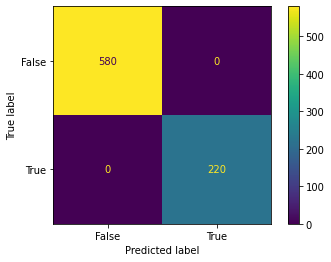

In [ ]:
# confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_train, training_data_prediction1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

[-0.062  0.158  0.112  0.057 -0.036  0.637  0.209  0.851  0.429  0.639
 -0.003  0.406  0.185  0.134  0.056  0.685 -0.008  0.092  0.554  0.629
  0.157  0.065  0.3   -0.086  0.121  0.251  0.495  0.022  0.344 -0.045
 -0.055 -0.076 -0.007  0.192  0.001  0.402  0.074  0.429 -0.052  0.108
  0.368  0.393  0.191  0.231  0.006 -0.021  1.063  0.381 -0.026  0.359
  0.455  0.477  0.022  0.276  0.     0.677  0.237  0.043 -0.011  0.227
  0.713  0.366  0.212  0.278  0.756  0.657 -0.076  0.132  0.069  0.077
  0.02   0.137  0.523 -0.147  0.039  0.014  0.153  0.102  0.283  0.682
  0.387  0.81   0.977  0.007  0.147  0.171  0.045  0.422  0.277  0.241
  0.93  -0.006  0.153  0.229  0.012  0.901 -0.021  0.443  0.153  0.59
  0.638  0.415  0.331  0.136  0.695  0.108  0.051  0.061 -0.044  0.66
  0.936 -0.01   0.192  0.064  0.19   0.352  0.742 -0.022  0.74   0.666
  0.21   0.131  0.09   0.148  0.409  0.122  1.208  0.701  0.458  0.156
 -0.024  0.489 -0.03   0.007 -0.012  0.016 -0.096  0.226  0.266  0.457
  0.322 

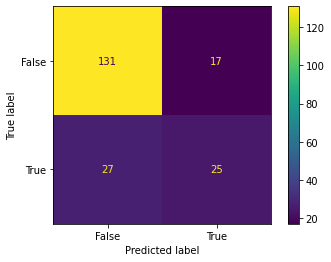

In [ ]:
testing_data_prediction = model.predict(X_test)
print(testing_data_prediction)
testing_data_prediction2 = testing_data_prediction.round()
print(testing_data_prediction2)
print(testing_data_prediction2.sum())

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, testing_data_prediction2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [ ]:
#F1 score
from sklearn.metrics import f1_score

f1_score = metrics.f1_score(Y_test, testing_data_prediction2)

#calculate F1 score
print(f1_score)

0.5319148936170213
